In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import statistics
import time

# to ignore the warnings
from warnings import filterwarnings

In [142]:
scores_df = pd.read_excel('./data/game_scores.xlsx')
scores_df.head()

,date,visitor,home,visitor_points,home_points
0,2015-11-25T01:00:00.000Z,Boston Celtics,Atlanta Hawks,97.0,121.0
1,2016-04-09T23:30:00.000Z,Boston Celtics,Atlanta Hawks,107.0,118.0
2,2016-04-16T23:00:00.000Z,Boston Celtics,Atlanta Hawks,101.0,102.0
3,2016-04-19T23:00:00.000Z,Boston Celtics,Atlanta Hawks,72.0,89.0
4,2016-04-27T00:30:00.000Z,Boston Celtics,Atlanta Hawks,83.0,110.0


In [143]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14242 entries, 0 to 14241
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            14242 non-null  object 
 1   visitor         14242 non-null  object 
 2   home            14242 non-null  object 
 3   visitor_points  12744 non-null  float64
 4   home_points     12744 non-null  float64
dtypes: float64(2), object(3)
memory usage: 556.5+ KB


In [144]:
# Find columns and total null values
scores_df.isnull().sum()

date                 0
visitor              0
home                 0
visitor_points    1498
home_points       1498
dtype: int64

In [172]:
# Convert date object to datetime data type
scores_df['date'] = pd.to_datetime(scores_df['date'], errors='coerce')
scores_df.dtypes

C:\Users\User\AppData\Local\Temp\ipykernel_13088\2483693105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_df['date'] = pd.to_datetime(scores_df['date'], errors='coerce')


date              datetime64[ns, UTC]
visitor                        object
home                           object
visitor_points                float64
home_points                   float64
dtype: object

In [173]:
# Find rows that contain null values
scores_df[scores_df['visitor_points'].isnull()]

,date,visitor,home,visitor_points,home_points


In [166]:
# Drop all rows that have no points for either team
df = scores_df.dropna()

# Display
df.isnull().sum()

date              0
visitor           0
home              0
visitor_points    0
home_points       0
dtype: int64

# NBA Team Analysis

C:\Users\User\AppData\Local\Temp\ipykernel_13088\2630600240.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=matchup_game, x='winner', ax=axes[1], palette='Set2')


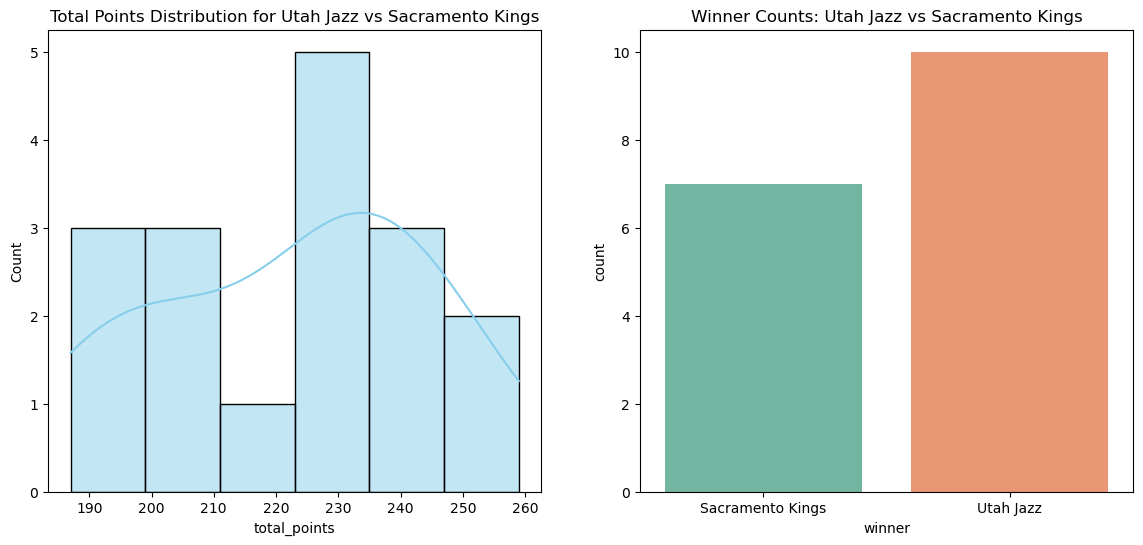

Statistics of Sacramento Kings vs Utah Jazz
------------------------------------
Mean: 222.41176470588235
Standard Deviation: 22.068243086869792
------------------------------------
z-score for 223.5: 0.05
z-score for 224.5: 0.09
z-score for 225.5: 0.14
z-score for 226.5: 0.19
z-score for 227.5: 0.23
z-score for 228.5: 0.28
z-score for 229.5: 0.32
z-score for 230.5: 0.37
z-score for 231.5: 0.41
z-score for 232.5: 0.46
z-score for 233.5: 0.50
z-score for 234.5: 0.55
z-score for 235.5: 0.59
z-score for 236.5: 0.64
z-score for 237.5: 0.68


,date,visitor,home,visitor_points,home_points,total_points,winner
14004,2016-01-15 02:00:00+00:00,Sacramento Kings,Utah Jazz,103.0,101.0,204.0,Sacramento Kings
14005,2016-12-11 02:00:00+00:00,Sacramento Kings,Utah Jazz,84.0,104.0,188.0,Utah Jazz
14006,2016-12-22 02:00:00+00:00,Sacramento Kings,Utah Jazz,94.0,93.0,187.0,Sacramento Kings
14007,2018-03-18 01:00:00+00:00,Sacramento Kings,Utah Jazz,97.0,103.0,200.0,Utah Jazz
14008,2018-11-22 02:00:00+00:00,Sacramento Kings,Utah Jazz,119.0,110.0,229.0,Sacramento Kings
14009,2019-04-06 01:00:00+00:00,Sacramento Kings,Utah Jazz,98.0,119.0,217.0,Utah Jazz
14010,2019-10-27 01:00:00+00:00,Sacramento Kings,Utah Jazz,81.0,113.0,194.0,Utah Jazz
14011,2020-01-19 02:00:00+00:00,Sacramento Kings,Utah Jazz,101.0,123.0,224.0,Utah Jazz
14012,2019-10-15 01:00:00+00:00,Sacramento Kings,Utah Jazz,128.0,115.0,243.0,Sacramento Kings
14013,2021-04-11 01:00:00+00:00,Sacramento Kings,Utah Jazz,112.0,128.0,240.0,Utah Jazz


In [168]:
def possible_outcome(dataframe, away_team, home_team, first_line): 
    # Filter the dataframe for the specific matchup
    matchup_game = dataframe.loc[(dataframe['visitor'] == away_team) & (dataframe['home'] == home_team)].copy()
    
    # Add a 'total_points' column 
    matchup_game['total_points'] = matchup_game['visitor_points'] + matchup_game['home_points']
    
    # Determine the winner
    matchup_game['winner'] = matchup_game.apply(lambda row: home_team if row['home_points'] > row['visitor_points']  else away_team, axis=1)
        
    # Create side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
      
    # Plot total points distribution with a KDE
    sns.histplot(data=matchup_game, x='total_points', kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f'Total Points Distribution for {home_team} vs {away_team}')
    
    # Plot the winner count    
    sns.countplot(data=matchup_game, x='winner', ax=axes[1], palette='Set2')
    axes[1].set_title(f'Winner Counts: {home_team} vs {away_team}')
        
    # Display the plots
    plt.show()
    
     # Calculate a z-score from a provided mean and standard deviation
    mean = matchup_game['total_points'].mean()
    standard_deviation = matchup_game['total_points'].std()
   
    # Create array of UNDER/OVER values starting with given first line
    under_over_lines = [first_line + i for i in range(15)]
    
    # Display basic statics of team matchup
    print(f'Statistics of {away_team} vs {home_team}')
    print('------------------------------------')
    print(f'Mean: {mean}')
    print(f'Standard Deviation: {standard_deviation}')

    print('------------------------------------')
    # Display the z-scores for each line score
    for line in under_over_lines:
        zscore = statistics.NormalDist(mean, standard_deviation).zscore(line)
        print(f'z-score for {line}: {zscore:.2f}')
    
    return matchup_game

away_team = input("Enter the away team: ")
home_team = input("Enter the home team: ")
first_line = float(input("Enter the first line for the over/under bet: "))


possible_outcome(df, away_team, home_team, first_line)

In [149]:
teams = df['visitor'].unique()
for team in teams:
    print(team)

Boston Celtics
Atlanta Hawks
Brooklyn Nets
Charlotte Hornets
Chicago Bulls
Cleveland Cavaliers
Dallas Mavericks
Denver Nuggets
Detroit Pistons
Golden State Warriors
Houston Rockets
Indiana Pacers
LA Clippers
Los Angeles Lakers
Memphis Grizzlies
Miami Heat
Milwaukee Bucks
Minnesota Timberwolves
New Orleans Pelicans
New York Knicks
Oklahoma City Thunder
Orlando Magic
Philadelphia 76ers
Phoenix Suns
Portland Trail Blazers
Sacramento Kings
San Antonio Spurs
Toronto Raptors
Utah Jazz
Washington Wizards
